
   - **Exercise 2 (Algorithmic Analysis):**
     - Choose a common DSP algorithm (e.g., FIR filter, FFT). Analyze its computational complexity in terms of time and space complexity. Implement the algorithm in Python and compare its performance with varying input sizes. Optimize the implementation if possible.

FFT Time: 0.020839 seconds
DFT Time: 0.070318 seconds


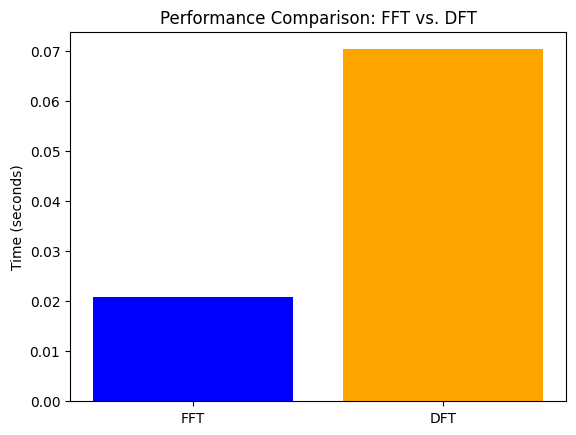

In [10]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

# Function for the FFT algorithm
def fft_algorithm(x):
    return np.fft.fft(x)

# Function for a simple DFT implementation
def dft_algorithm(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Compare the performance of FFT and DFT algorithms
input_size = 2**10  # Choose a power of 2 for simplicity
data = np.random.rand(input_size)

fft_time = timeit.timeit(lambda: fft_algorithm(data), number=1000)
dft_time = timeit.timeit(lambda: dft_algorithm(data), number=1)

print(f"FFT Time: {fft_time:.6f} seconds")
print(f"DFT Time: {dft_time:.6f} seconds")

# Plot the results
labels = ['FFT', 'DFT']
times = [fft_time, dft_time]

plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: FFT vs. DFT')
plt.show()


   - **Exercise 1 (DFT in Python):**
     - Implement a Python function to calculate the Discrete Fourier Transform (DFT) of a given signal. Verify your implementation by comparing it with the output of NumPy's `fft` function.

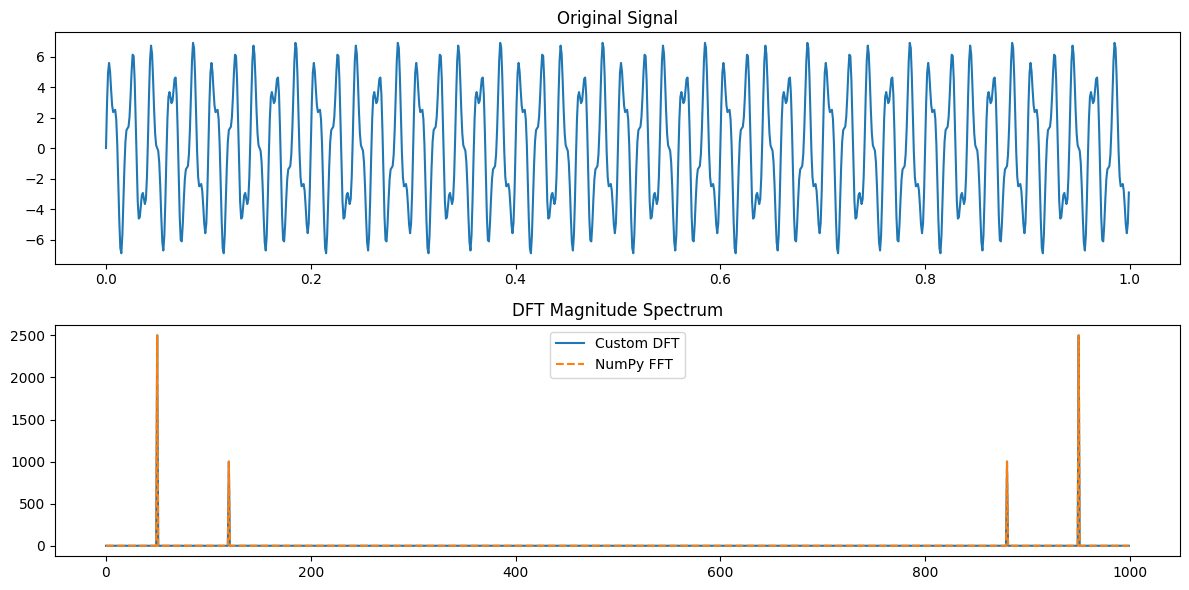

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def my_dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
signal = 5 * np.sin(2 * np.pi * 50 * t) + 2 * np.sin(2 * np.pi * 120 * t)

# Calculate DFT using the custom function
dft_result = my_dft(signal)

# Verify with NumPy's fft function
numpy_dft_result = np.fft.fft(signal)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(np.abs(dft_result), label='Custom DFT')
plt.plot(np.abs(numpy_dft_result), linestyle='dashed', label='NumPy FFT')
plt.legend()
plt.title('DFT Magnitude Spectrum')

plt.tight_layout()
plt.show()




   - **Exercise 2 (FFT for Real-time Signal Processing):**
     - Create a Python script that reads an audio signal in real-time, performs FFT on the incoming samples, and plots the real-time spectrum. Use libraries like `pyaudio` for audio input and NumPy for FFT computation.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio

# Set parameters
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024

# Initialize PyAudio
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

# Plot real-time spectrum
plt.ion()
fig, ax = plt.subplots()
x_vals = np.fft.fftfreq(CHUNK, 1/RATE)
line, = ax.plot(x_vals, np.zeros(CHUNK))

ax.set_xlim(0, RATE/2)
ax.set_ylim(0, 50)

while True:
    data = np.frombuffer(stream.read(CHUNK), dtype=np.int16)
    fft_result = np.fft.fft(data)
    fft_magnitude = np.abs(fft_result)[:CHUNK // 2]

    line.set_ydata(fft_magnitude)
    fig.canvas.draw()
    fig.canvas.flush_events()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1024,) and arg 1 with shape (512,).

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1024,) and arg 1 with shape (512,).

<Figure size 640x480 with 1 Axes>

 **Exercise 1 (Mathematical Representation in Python):**
     - Implement a Python class representing a simple digital filter. Include methods to set filter coefficients, apply the filter to a given signal, and visualize the frequency response of the filter.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

class DigitalFilter:
    def __init__(self, b_coefficients, a_coefficients):
        self.b = b_coefficients
        self.a = a_coefficients

    def apply_filter(self, input_signal):
        # Apply the filter using convolution
        output_signal = np.convolve(self.b, input_signal)
        if len(self.a) > 1:
            output_signal -= np.convolve(self.a[1:], output_signal[:-len(self.a) + 1])
        return output_signal

    def plot_frequency_response(self, fs=1.0):
        w, h = np.freqz(self.b, self.a, worN=8000)
        plt.figure()
        plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
        plt.title('Digital filter frequency response')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Gain')
        plt.grid()
        plt.show()

# Example usage
b_coefficients = [1, -0.5]
a_coefficients = [1, -0.7, 0.1]
my_filter = DigitalFilter(b_coefficients, a_coefficients)

# Generate a sample signal
t = np.linspace(0, 1, 1000, endpoint=False)
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=len(t))

# Apply the filter
output_signal = my_filter.apply_filter(input_signal)

# Plot original and filtered signals
plt.figure()
plt.plot(t, input_signal, label='Original Signal')
plt.plot(t, output_signal, label='Filtered Signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Plot frequency response
my_filter.plot_frequency_response()

ValueError: operands could not be broadcast together with shapes (1001,) (1000,) (1001,) 